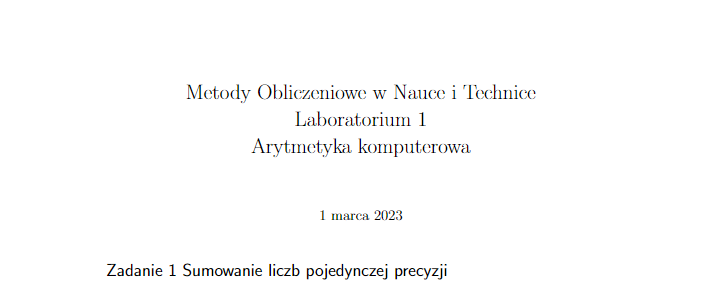

Importuję potrzebne bilioteki, tworzę funkcję która zapisauje do zmiennych globalnych podane dane wejściowe, zwraca również tablicę odpowiednio wypełnioną danymi.

float32() - powzwala na przechowywanie liczby w dokładniejszej postaci o pojedynczej prezycji. Pozwala na przechowywanie 8 cyfrowej liczby.

In [1]:
from numpy import float32
from matplotlib import pyplot as plt
from time import time
import numpy as np
from scipy.optimize import curve_fit

correct = 0
val = float32(0.00000)
N = 0

def write_values(value, correct_val, numOfItems):
    global correct
    global val
    global N
    N = numOfItems
    correct = correct_val
    val = float32(value)
    return [val for i in range(N)]

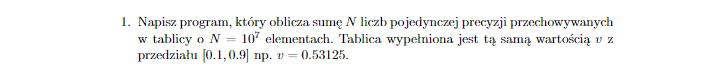

In [14]:
def sum_arr(arr):
    sumOf = float32(0.00000)
    for i in range(len(arr)):
        sumOf += arr[i]
    return sumOf

arr_num = write_values(float32(0.53125), 5312500, 10**7)
sumOfArr = sum_arr(arr_num)
print("Sum of array: ", sumOfArr)

Sum of array:  5030840.5


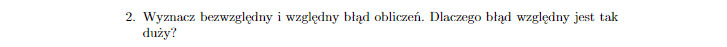

In [15]:
abs_error_i = abs(correct - sumOfArr)
rel_error_i = abs_error_i / correct
print("absolute error: ", abs_error_i)
print("relative error: ",round(rel_error_i*100 , 2), "%")

absolute error:  281659.5
relative error:  5.3 %


Podczas sumowania liczb dochodzi do błędu spowodowanego niedokładną reprezentacją liczb zmiennoprzecinkowych. Wraz z dodawaniem kolejnych liczb błąd ten wzrasta i się kumuluje co można zaobserwować w #1.3. Ponadto sumowane liczby mają coraz większą różnicę między sobą co również generuje błąd - większy niż jakby to była suma dwóch takich samych. (Na przykład ostatni przypadek 281658.97 + 0.53125)

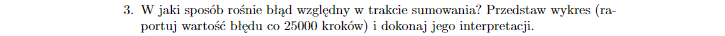

In [16]:
def plotError():
    global val
    global N
    global arr_num
    sumOfArr = float32(0.00000)
    error_value = []
    for i in range(1, N + 1):
        if i % 25000 == 0:
            error_value.append(abs(sumOfArr - i * val) / (i * val))
        sumOfArr += arr_num[i - 1]

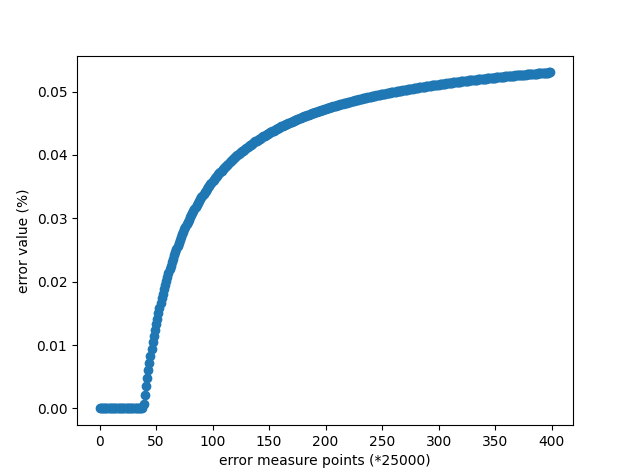

Powyższy wykres pokazuje zmianę błędu od ilości sumowanych elementów algorytmem iteracyjnym. Błąd zwiększa się nie liniowo od pewnego momentu ze względu na powiększającą się różnicę między dodawanymi liczbami

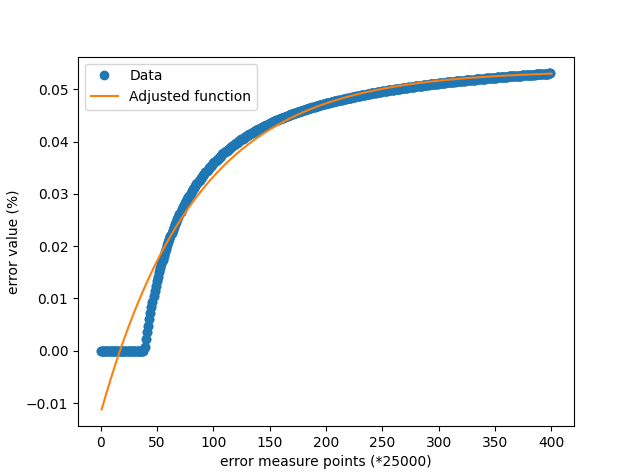

Dopasowana funkcja jest podobna do funkcji logarytmicznej

Fragment kodu generujący powyższe wykresy:

In [ ]:
    # point_value = [i for i in range(N // 25000)]
    # plt.figure()
    # plt.xlabel("error measure points (*25000)")
    # plt.ylabel("error value (%)")

    # plt.scatter(point_value, error_value)
    # popt, pcov = curve_fit(custom_func, point_value, error_value)
    # x_fit = np.linspace(1, N // 25000, num=N // 25000)
    # y_fit = custom_func(x_fit, *popt)
    # plt.plot(point_value, error_value, "o", label="Data")
    # plt.plot(x_fit, y_fit, label="Adjusted function")

    # plt.legend()
    # plt.show()

# def custom_func(x, a, b, c):
#     return a * np.exp(-b * x) + c

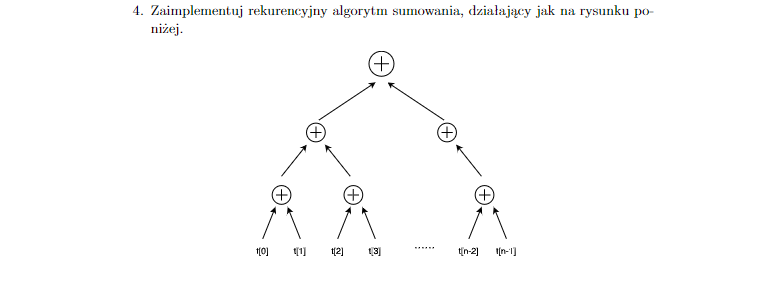

In [17]:
def sum_rec(nums):
    if len(nums) == 0:
        return 0
    elif len(nums) == 1:
        return nums[0]
    else:
        middle = len(nums) // 2
        left = nums[:middle]
        right = nums[middle:]
        # return sum_rec(left) + sum_rec(middle)
        return sum_rec(nums[: len(nums) // 2]) + sum_rec(nums[len(nums) // 2 :])


sum_rek = sum_rec(arr_num)
print("recursive sum: ", sum_rek)

recursive sum:  5312500.0


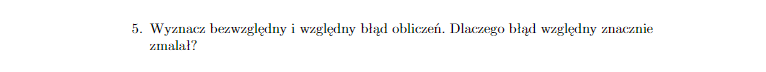

In [18]:
abs_error_rek = abs(correct - sum_rek)
rel_error_rek = abs_error_rek / correct
print("absolute error for recursive: ", abs_error_rek)
print("relative error for recursive: ", round(rel_error_rek *100, 2), "%")

absolute error for recursive:  0.0
relative error for recursive:  0.0 %


Różnica między błędami:

In [19]:
print("absolute error: for recursive: ", abs_error_rek)
print("absolute error: for iterative: ", abs_error_i)
print("absolute error diffrence: ", abs(abs_error_i-abs_error_rek))

print("relative error for recursive: ", round(rel_error_rek *100, 2), "%")
print("relative error for iterative: ", round(rel_error_i *100, 2), "%")
print("relative error diffrence: ", abs(round(rel_error_i *100, 2)-round(rel_error_rek *100, 2)), "%")

absolute error: for recursive:  0.0
absolute error: for iterative:  281659.5
absolute error diffrence:  281659.5
relative error for recursive:  0.0 %
relative error for iterative:  5.3 %
relative error diffrence:  5.3 %


Błąd względny zmalał ponieważ poprzez rekursję wyeliminowano błąd wynikający z dodawania 2 dużo różniących się liczb

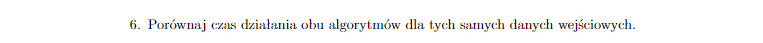

In [20]:
start_s = time()
sum_arr(arr_num)
end_s = time()

start_r = time()
sum_rec(arr_num)
end_r = time()

print("iterative time: ", round(end_s - start_s, 2), "s")
print("recursive time: ", round(end_r - start_r, 2), "s")

iterative time:  0.84 s
recursive time:  8.07 s


Czas sumowania rekurencyjnego jest dłuższy ze względu na naturę rekurencji

---------------------------------------------------------------------------

Fragment kodu z poprzedniego zadania potrzebny na wykonanie zadania 2

In [27]:
from numpy import float32
from time import time

correct = 0
val = float32(0.00000)
N = 0


def write_values(value, correct_val, numOfItems):
    global correct
    global val
    global N
    N = numOfItems
    correct = correct_val
    val = float32(value)
    return [val for i in range(N)]


arr_num = write_values(float32(0.53125), 5312500, 10**7)
def sum_rec(nums):
    if len(nums) == 0:
        return 0
    elif len(nums) == 1:
        return nums[0]
    else:
        middle = len(nums) // 2
        left = nums[:middle]
        right = nums[middle:]
        # return sum_rec(left) + sum_rec(middle)
        return sum_rec(nums[: len(nums) // 2]) + sum_rec(nums[len(nums) // 2 :])

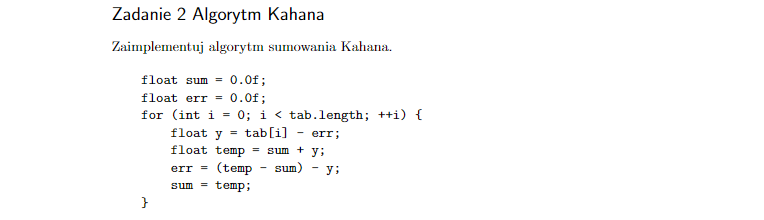

In [28]:
def kahan(nums):
    sumOf = float32(0.00000)
    err = float32(0.00000)
    for num in nums:
        y = num - err
        temp = sumOf + y
        err = (temp - sumOf) - y
        sumOf = temp

    return sumOf

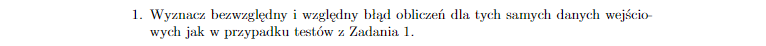

In [29]:
abs_error = abs(correct - kahan(arr_num))
rel_error = abs_error / correct
print("absolute error: ", abs_error)
print("relative error: ", round(rel_error * 100, 2), "%")

absolute error:  0.0
relative error:  0.0 %


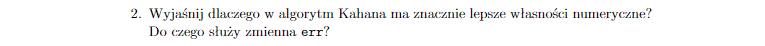

Zmienna 'err' służy do trzymania aktualnego błędu tak aby przy kazdym sumowaniu poprawiac wynik.
Algorytm kahana ma znacznie lepsze własności numeryczne ponieważ bieże pod poprawę błąd wynikający z sumowania

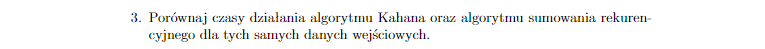

In [30]:
start_k = time()
kahan(arr_num)
end_k = time()
print(f"kahan algorithm: ", round(end_k - start_k, 2), "s")

start_r = time()
sum_rec(arr_num)
end_r = time()
print(f"recursive algorithm: ", round(end_r - start_r, 2), "s")

kahan algorithm:  2.57 s
recursive algorithm:  8.5 s


---------------------------------------------------------------------------------------